# Case Study 2 - Predicting Hospital Readmittance

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)
    - [Alternative Modeling Approaches](#alternative-modeling-approaches)

# Business Understanding & Executive Summary <a id='business-understanding'/>

### Scope <a id='scope'/>


### Introduction <a id='introduction'/>


### Methods <a id='methods'/>
 
 
### Results <a id='results'/>
 

# Data Evaluation <a id='data-evaluation'>
    

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# prediction models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from kneed import KneeLocator
from scipy import stats

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

## Loading Data <a id='loading-data'>

In [2]:
os.getcwd()

'C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_2'

In [3]:
#os.chdir('C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022')

In [4]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values='?') 

C:\Users\allep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
adm_type = pd.read_csv('dataset_diabetes/IDs_mapping.csv') 

## Data Summary <a id='data-summary'>

## Missing Values <a id='missing-values'>

Missing values are represented as "?" in the dataset.  These were converted to NaN when loading the data.

In [6]:
nulls = df.isnull().describe()
nulls

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,1,1,2,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,101766,101766,99493,101766,101766,98569,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766


In [7]:
cols = nulls.columns
missing_col = [c for c in cols if nulls[c]['unique'] == 2]
print("\nColumns Missing Data", missing_col)


Columns Missing Data ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


## Feature Removal <a id='feature-removal'>

Columns 'encounter_id' and 'patient_nbr' are data table keys (unique identifiers) that should be removed for modeling.

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# encounter_id and patient_nbr are data table keys (unique identifiers) that should be removed for modeling
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

## Exploratory Data Analysis (EDA) <a id='eda'>

### Response 'readmitted'
We want to predict if 'readmitted' is <30 or not.  Recode to combine >30 and NO.

In [10]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [11]:
# Recode 'readmitted' to binary: <30 or not <30
df['readmit_binary'] = df['readmitted']=='<30'
df['readmit_binary'].value_counts()

False    90409
True     11357
Name: readmit_binary, dtype: int64

In [12]:
df['readmit_binary'].value_counts(normalize=True)

False    0.888401
True     0.111599
Name: readmit_binary, dtype: float64

In [13]:
cont_summary = df.describe()
cont_summary

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Group variables by continuous and categorical types

In [14]:
# Column names of features coded as continuous
cont_summary.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [15]:
# Recode id variables to categorical
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

In [16]:
# Continuous variables in the dataset
cont_vars = list( df.describe().columns )
cont_vars

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

#### Continuous Feature EDA
A few "continuous" features are discrete and highly zero-inflated.  There is a positive correlation between num_medications and num_procedures

In [17]:
# Continuous predictor distributions and correlations
#sns.pairplot(df[cont_vars], diag_kind='kde', corner=True)

In [18]:
plot_vars = list(cont_vars)
plot_vars.append('readmit_binary')

#### Response vs. Numeric Features
Not much visual separation or shifts in the response classes vs. the numeric variables.  These are likely poor class predictors.

In [19]:
#sns.pairplot(df[plot_vars], hue='readmit_binary', corner=True)

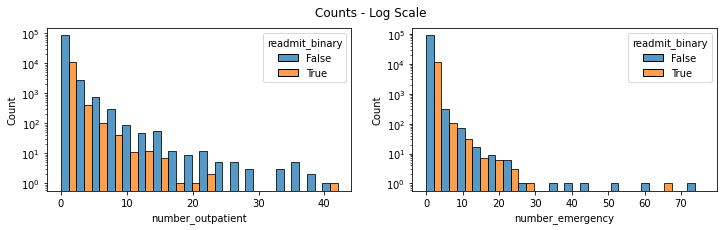

In [20]:
# Use y log scale on zero-inflated features to see counts better 

zero_inflated = ['number_outpatient', 'number_emergency']
num = len(zero_inflated)

fig, axes = plt.subplots(1, num, figsize=(12, 3))
fig.suptitle('Counts - Log Scale')
for i,j in zip(zero_inflated, range(num)):
    sns.histplot(ax = axes[j], x = df[i], hue=df['readmit_binary'], multiple="dodge", log_scale=[False, True]); 

In [21]:
# Categorical variables in the dataset
cat_vars = list( df.columns.drop(cont_vars) )

# Remove response variables
cat_vars.remove('readmitted')
cat_vars.remove('readmit_binary')
np.array(cat_vars)

array(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype='<U24')

In [22]:
df[cat_vars].head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,NaN,Pediatrics-Endocrinology,250.83,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,NaN,NaN,276,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,NaN,NaN,648,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,NaN,NaN,8,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,NaN,NaN,197,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [23]:
# Explore categorical variables
cat_desc = df[cat_vars].describe()
cat_desc

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,99493,101766,101766,3197,101766,101766,101766,61510,51817,101745,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,8,26,17,17,72,716,...,1,1,4,4,2,2,2,2,2,2
top,Caucasian,Female,[70-80),[75-100),1,1,7,MC,InternalMedicine,428,...,No,No,No,No,No,No,No,No,No,Yes
freq,76099,54708,26068,1336,53990,60234,57494,32439,14635,6862,...,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363


In [24]:
# Drop columns with only one unique value (no information for modeling)

cols = cat_desc.columns
col_drops = [c for c in cols if cat_desc[c]['unique'] == 1]
print("Material Drops", col_drops)
[cat_vars.remove(c) for c in col_drops]

print("# Categorical Variables =", len(cat_vars))

Material Drops ['examide', 'citoglipton']
# Categorical Variables = 37


In [25]:
# Drop columns with missing data
cat_vars_nonull = list(cat_vars)
[cat_vars_nonull.remove(c) for c in missing_col]
print("# Non-Missing Categorical Variables =", len(cat_vars_nonull))

# Non-Missing Categorical Variables = 30


### Feature Collinearity <a id='feature-collinearity'>


### Feature Outliers 
 

## Assumptions <a id='assumptions'>

# Model Preparations <a id='model-preparations'/>

## Sampling & Scaling Data <a id='sampling-scaling-data' />

In [26]:
# Define y and X
y = np.array(df['readmit_binary'].astype(int)) # needs to be int for Logistic Regression

X_cont = df[cont_vars]
print('# Continuous Variables =', len(cont_vars))

# Continuous Variables = 8


In [55]:
# Split the data for X[cont_vars]
X_train, X_test, y_train, y_test = train_test_split(X_cont, y, test_size = 0.3, random_state = 12343) 

# Center and Scale X
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train) # apply to training
X_test_scaled = scl.transform(X_test) # apply to the test set (without snooping)

# Keep the feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_cont.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_cont.columns, index = X_test.index)

#### Check that the training & test set classes for y are balanced - They are good.

In [28]:
pd.DataFrame(y_train).value_counts(normalize=True)

0    0.887571
1    0.112429
dtype: float64

In [29]:
pd.DataFrame(y_test).value_counts(normalize=True)

0    0.890337
1    0.109663
dtype: float64

## Proposed Method <a id='proposed-metrics' />

## Evaluation Metrics <a id='evaluation-metrics' />

### Baseline Model

#### Use all continuous variables to predict readmittance <30 days. 

In [30]:
lgr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cont = cross_validate(lgr, X_train_scaled, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cont['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cont['test_precision'] ) 
print( 'cv recalls:   ', lgr_cont['test_recall'] ) 
print( 'cv f1s:       ', lgr_cont['test_f1'] )
print( 'cv AUCs:      ', lgr_cont['test_roc_auc'] ) 

cv accuracies: [0.68192538 0.68325963 0.67900611]
cv precisions: [0.1726773  0.1693922  0.16449864]
cv recalls:    [0.482397   0.4657175  0.45468165]
cv f1s:        [0.25431928 0.2484261  0.24159204]
cv AUCs:       [0.63535653 0.62430403 0.62485935]


In [56]:
lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

#### Training Set

In [57]:
confusion_matrix(y_train, y_hat_train)

array([[44826, 18401],
       [ 4248,  3761]], dtype=int64)

In [58]:
print( classification_report(y_train, y_hat_train) )

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     63227
           1       0.17      0.47      0.25      8009

    accuracy                           0.68     71236
   macro avg       0.54      0.59      0.52     71236
weighted avg       0.83      0.68      0.74     71236



#### Test Set - Consistent with Training Set

In [32]:
confusion_matrix(y_test, y_hat_test)

array([[19309,  7873],
       [ 1760,  1588]], dtype=int64)

In [33]:
print( classification_report(y_test, y_hat_test) )

              precision    recall  f1-score   support

           0       0.92      0.71      0.80     27182
           1       0.17      0.47      0.25      3348

    accuracy                           0.68     30530
   macro avg       0.54      0.59      0.52     30530
weighted avg       0.83      0.68      0.74     30530



In [34]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

,feature,coef
2,num_procedures,-0.052917
4,number_outpatient,-0.010000
1,num_lab_procedures,0.008583
5,number_emergency,0.056351
3,num_medications,0.058068
0,time_in_hospital,0.084031
7,number_diagnoses,0.103497
6,number_inpatient,0.361958


## Use imputed categorical data to predict readmitted

In [35]:
os.chdir('C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_2')

In [36]:
df_imp = pd.read_csv('diabetic_data_imputed.csv')

In [37]:
df_imp['readmit_binary'] = df_imp['readmitted']=='<30'

In [38]:
y = df_imp['readmit_binary'].astype(int)
df_imp = df_imp.drop(['Unnamed: 0','readmitted','readmit_binary'], axis=1)

In [59]:
# Split the data for X
X_train, X_test, y_train, y_test = train_test_split(df_imp, y, test_size = 0.3, random_state = 12343) 

# Center and Scale X
scl = StandardScaler()
scl.fit(X_train[cont_vars])
X_train_scaled = pd.DataFrame( scl.transform(X_train[cont_vars]), columns = cont_vars, index = X_train.index) # apply to training
X_test_scaled = pd.DataFrame( scl.transform(X_test[cont_vars]), columns = cont_vars, index = X_test.index ) # apply to the test set (without snooping)

X_train_cat = X_train.drop(X_train._get_numeric_data().columns, 1)
X_test_cat = X_test.drop(X_train._get_numeric_data().columns, 1)

In [60]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train_cat)

X_train_cat_e = pd.DataFrame( enc.transform(X_train_cat).toarray(), columns = enc.get_feature_names(), index = X_train.index)
X_test_cat_e = pd.DataFrame(enc.transform(X_test_cat).toarray(), columns = enc.get_feature_names(), index = X_test.index)

In [61]:
X_train_scaled = pd.concat([X_train_scaled, X_train_cat_e], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_cat_e], axis=1)

In [42]:
lgr = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', class_weight='balanced')

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cont = cross_validate(lgr, X_train_scaled, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cont['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cont['test_precision'] ) 
print( 'cv recalls:   ', lgr_cont['test_recall'] ) 
print( 'cv f1s:       ', lgr_cont['test_f1'] )
print( 'cv AUCs:      ', lgr_cont['test_roc_auc'] ) 

cv accuracies: [0.63859176 0.64426195 0.63836597]
cv precisions: [0.17170147 0.17140582 0.16589497]
cv recalls:    [0.57902622 0.56463095 0.55018727]
cv f1s:        [0.26486209 0.2629788  0.25492408]
cv AUCs:       [0.65333517 0.65007563 0.64625736]


In [62]:
lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

#### Training Set

In [63]:
confusion_matrix(y_train, y_hat_train)

array([[41263, 21964],
       [ 3364,  4645]], dtype=int64)

In [64]:
print( classification_report(y_train, y_hat_train) )

              precision    recall  f1-score   support

           0       0.92      0.65      0.77     63227
           1       0.17      0.58      0.27      8009

    accuracy                           0.64     71236
   macro avg       0.55      0.62      0.52     71236
weighted avg       0.84      0.64      0.71     71236



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.668


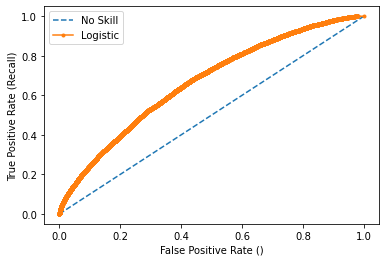

In [65]:
# zeros for 50% AUC line a.k.a. "No Skill" (ns) 
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = lgr.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate ()')
pyplot.ylabel('True Positive Rate (Recall)')
pyplot.legend()
pyplot.show()

#### Test Set - Consistent with Training Set

In [45]:
confusion_matrix(y_test, y_hat_test)

array([[17717,  9465],
       [ 1399,  1949]], dtype=int64)

In [47]:
print( classification_report(y_test, y_hat_test) )

              precision    recall  f1-score   support

           0       0.93      0.65      0.77     27182
           1       0.17      0.58      0.26      3348

    accuracy                           0.64     30530
   macro avg       0.55      0.62      0.51     30530
weighted avg       0.84      0.64      0.71     30530



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.666


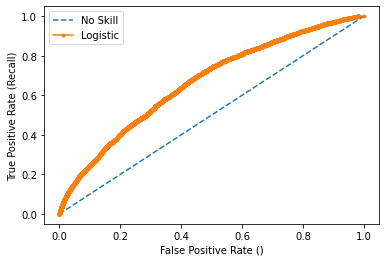

In [48]:
# zeros for 50% AUC line a.k.a. "No Skill" (ns) 
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = lgr.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate ()')
pyplot.ylabel('True Positive Rate (Recall)')
pyplot.legend()
pyplot.show()

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

## Feature Selection <a id='feature-selection' />

In [49]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
feat_coef.loc[abs(feat_coef['coef'])>0.9].sort_values(by='coef')

,feature,coef
197,x30_expired,-4.083902
80,x4_Pediatrics-Endocrinology,-1.858176
72,x4_Osteopath,-1.405089
56,x4_Gynecology,-1.233001
239,x34_K,-1.118434
257,x35_K,-1.004907
152,x15_Steady,-0.955400
210,x32_trauma-center,-0.902286
222,x33_K,0.987511
43,x4_AllergyandImmunology,1.137102


### 'expired' and 'admitted' are not value-added dummy variables.  You don't need a model to tell you that a patient that died (expired) won't be readmitted, or that a patient must be admitted prior to being readmitted.  

In [50]:
X_train_scaled = X_train_scaled.drop(['x30_expired','x30_admitted'], axis=1)
X_test_scaled = X_test_scaled.drop(['x30_expired','x30_admitted'], axis=1)

In [51]:
lgr = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', class_weight='balanced')

scoring = ['accuracy','precision','recall','f1','roc_auc']
lgr_cont = cross_validate(lgr, X_train_scaled, y_train, cv = 3, scoring=scoring)

print( 'cv accuracies:', lgr_cont['test_accuracy'] ) # accuracies from 3 folds
print( 'cv precisions:', lgr_cont['test_precision'] ) 
print( 'cv recalls:   ', lgr_cont['test_recall'] ) 
print( 'cv f1s:       ', lgr_cont['test_f1'] )
print( 'cv AUCs:      ', lgr_cont['test_roc_auc'] ) 

cv accuracies: [0.63850754 0.64535692 0.63857654]
cv precisions: [0.17107898 0.1710135  0.16553519]
cv recalls:    [0.57602996 0.56013488 0.54794007]
cv f1s:        [0.26380789 0.26202787 0.25425791]
cv AUCs:       [0.6523112  0.64914921 0.64497538]


In [52]:
lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

### No major change in model performance after removing 'expired' and 'admitted'

In [53]:
print( classification_report(y_test, y_hat_test) )

              precision    recall  f1-score   support

           0       0.93      0.65      0.77     27182
           1       0.17      0.58      0.26      3348

    accuracy                           0.64     30530
   macro avg       0.55      0.62      0.51     30530
weighted avg       0.84      0.64      0.71     30530



In [54]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
feat_coef.loc[abs(feat_coef['coef'])>0.9].sort_values(by='coef')

,feature,coef
80,x4_Pediatrics-Endocrinology,-1.862164
72,x4_Osteopath,-1.406682
56,x4_Gynecology,-1.230864
237,x34_K,-1.123495
255,x35_K,-1.011553
152,x15_Steady,-0.997720
208,x32_trauma-center,-0.920345
220,x33_K,0.973490
43,x4_AllergyandImmunology,1.140142
57,x4_Hematology,1.214702


#### columns x33-34_K = diagnoses (diag 1-3) for complications in child birth

# Model Building & Evaluations <a id='model-building'/>

## Sampling Methodology <a id='sampling-methodology'/>

#### Per the code above we used a 70/30 train test sample split with 3 or 5 fold internal cross validation for training

## Model's Performance Analysis <a id='performance-analysis'/>

# Model Interpretability & Explainability <a id='model-explanation'>

## Examining Feature Importance <a id='examining-feature-importance'/>

# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

### Alternative Modeling Approaches <a id='alternative-modeling-approaches'>